<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/web/lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [27]:
# データロード
df = sns.load_dataset('mpg')
# 欠損値ありレコード削除
df.dropna(inplace=True)

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

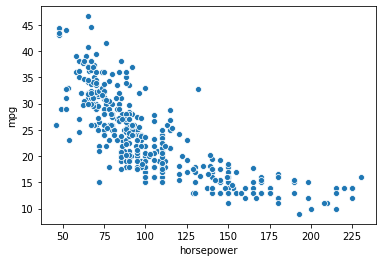

In [28]:
# 散布図
# 非線形を確認できる
sns.scatterplot(df['horsepower'], df['mpg'])

In [34]:
# 特徴量を多項式特徴量に変換
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X)

In [35]:
# モデル作成
model = LinearRegression()

model.fit(X_poly, y)

# 傾き：coef_
# 切片：intercept_
print('coef:{}\nintercept_:{}'.format(model.coef_, model.intercept_))

# バイアス項（第１要素）も学習されているが、0であるため結果落とされる

coef:[ 0.00000000e+00  3.70010324e+00 -7.14240251e-02  5.93108365e-04
 -2.28107588e-06  3.32955263e-09]
intercept_:-32.23034954969367


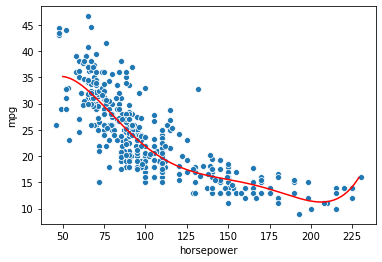

In [36]:
# X軸の精製
x = np.arange(50, 230).reshape(-1, 1)
# 特徴量を多項式特徴量に変換
x_ = poly.fit_transform(x)

# 予測
pred_ = model.predict(x_)

# 描画
sns.scatterplot(df['horsepower'], df['mpg'])
plt.plot(x, pred_, 'r')